# Window Function

Adarsh Ram

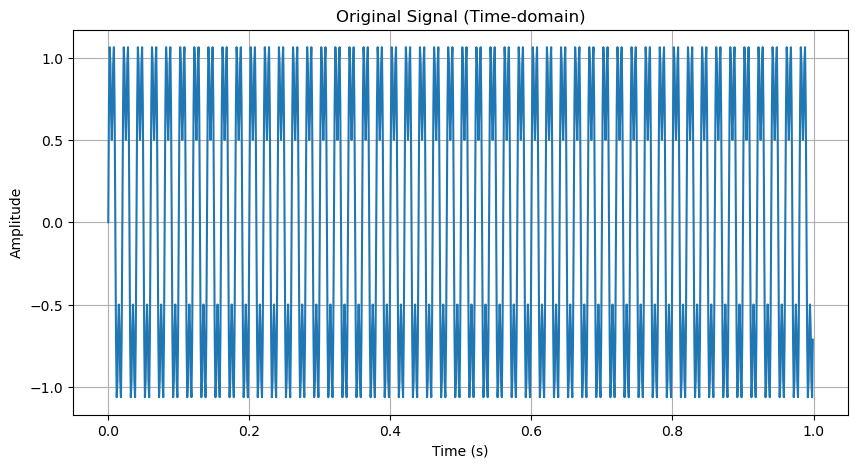

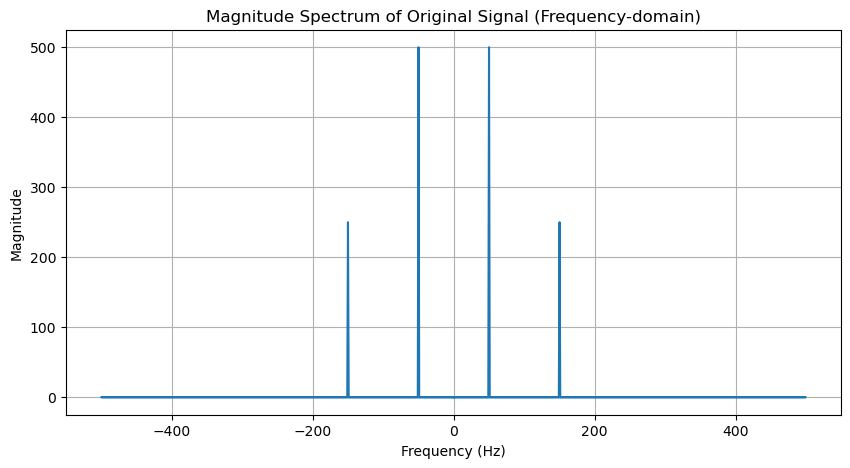

AttributeError: module 'numpy' has no attribute 'rectangular'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 1000
T = 1
N = int(fs * T)
t = np.linspace(0, T, N, endpoint=False)
f1 = 50
f2 = 150

signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)

plt.figure(figsize=(10, 5))
plt.plot(t, signal)
plt.title('Original Signal (Time-domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

freqs = np.fft.fftfreq(N, 1/fs)
fft_signal = np.fft.fft(signal)
mag_spectrum = np.abs(fft_signal)

plt.figure(figsize=(10, 5))
plt.plot(freqs, mag_spectrum)
plt.title('Magnitude Spectrum of Original Signal (Frequency-domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

windows = ['rectangular', 'hanning', 'hamming', 'bartlett', 'nuttall']
for window_name in windows:
    window = getattr(np, window_name)(N)
    windowed_signal = signal * window
    
    plt.figure(figsize=(10, 5))
    plt.plot(t, windowed_signal)
    plt.title(f'{window_name.capitalize()} Windowed Signal (Time-domain)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()
    
    fft_windowed_signal = np.fft.fft(windowed_signal)
    mag_spectrum_windowed = np.abs(fft_windowed_signal)
    
    energy_ratio = np.sum(np.square(signal)) / np.sum(np.square(windowed_signal))
    mag_spectrum_windowed *= np.sqrt(energy_ratio)
    
    plt.figure(figsize=(10, 5))
    plt.plot(freqs, mag_spectrum_windowed)
    plt.title(f'Magnitude Spectrum of {window_name.capitalize()} Windowed Signal (Frequency-domain)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

By weakening signal lines, windowing changes the energy, which results in less total energy. Windowed signal energy can be matched to the original with the right correction. It changes spectral predictions by changing peak form and leakage. Some windows, like Hanning, make leakage less noticeable so that peaks are sharper, while others, like rectangular, make it more noticeable. Frequency clarity and crosstalk are affected by the main-lobe width and side-lobe level. Windowing can make it hard to accurately find peaks and frequencies, especially when the peaks are close together or the signals are noisy. To get accurate results, you need to be careful when choosing windows and using signal processing methods to balance trade-offs.